In [22]:
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.append(str(project_root))
import matplotlib.pyplot as plt
import numpy as np
from src.data_loading.simple_loader import load_processed_berkeley_earth, load_processed_era5, load_berkeley_earth
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

In [2]:
be_tavg = load_processed_berkeley_earth(variable='tavg')
be_tmax = load_processed_berkeley_earth(variable='tmax')
be_tmin = load_processed_berkeley_earth(variable='tmin')
era5_tavg = load_processed_era5(variable='tavg')
era5_tmax = load_processed_era5(variable='tmax')
era5_tmin = load_processed_era5(variable='tmin')

In [3]:
# calculate global averages with area weighting and plot
weights = be_tavg.areal_weight
be_tavg_global = be_tavg.temperature.weighted(weights).mean(('latitude','longitude'))
be_tmax_global = be_tmax.temperature.weighted(weights).mean(('latitude','longitude'))
be_tmin_global = be_tmin.temperature.weighted(weights).mean(('latitude','longitude'))
era5_tavg_global = era5_tavg.temperature.weighted(weights).mean(('latitude','longitude'))
era5_tmax_global = era5_tmax.temperature.weighted(weights).mean(('latitude','longitude'))
era5_tmin_global = era5_tmin.temperature.weighted(weights).mean(('latitude','longitude'))

(np.float64(14610.0), np.float64(20454.0))

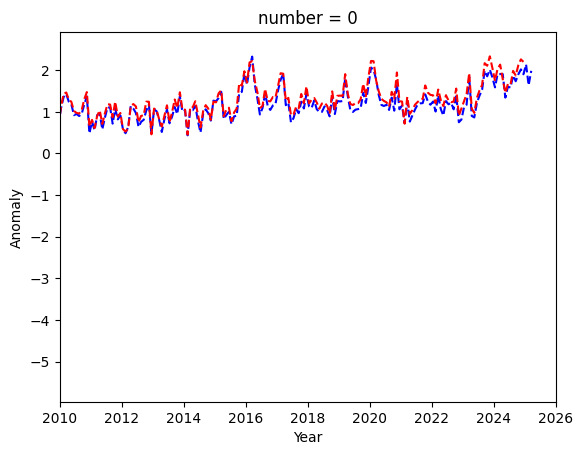

In [10]:
#be_tavg_global.plot(label='Berkeley Earth Tavg', color='blue')
#be_tmax_global.plot(label='Berkeley Earth Tmax', color='blue', linestyle='--')
be_tmin_global.plot(label='Berkeley Earth Tmin', color='blue', linestyle='--')
#era5_tavg_global.plot(label='ERA5 Tavg', color='red')
#era5_tmax_global.plot(label='ERA5 Tmax', color='red', linestyle='--')
era5_tmin_global.plot(label='ERA5 Tmin', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Anomaly')
# set xlimit to 2000 to 2026. Note the dates are in date-time format
plt.xlim(np.datetime64('2010-01-01'), np.datetime64('2026-01-01'))

In [ ]:
# recreate calculate global average but only for land temperatures
be_tavg_global_land = be_tavg.temperature.where(be_tavg.land_mask).weighted(weights).mean(('latitude','longitude'))
be_tmax_global_land = be_tmax.temperature.where(be_tavg.land_mask).weighted(weights).mean(('latitude','longitude'))
be_tmin_global_land = be_tmin.temperature.where(be_tavg.land_mask).weighted(weights).mean(('latitude','longitude'))
era5_tavg_global_land = era5_tavg.temperature.where(be_tavg.land_mask).weighted(weights).mean(('latitude','longitude'))
era5_tmax_global_land = era5_tmax.temperature.where(be_tavg.land_mask).weighted(weights).mean(('latitude','longitude'))
era5_tmin_global_land = era5_tmin.temperature.where(be_tavg.land_mask).weighted(weights).mean(('latitude','longitude'))

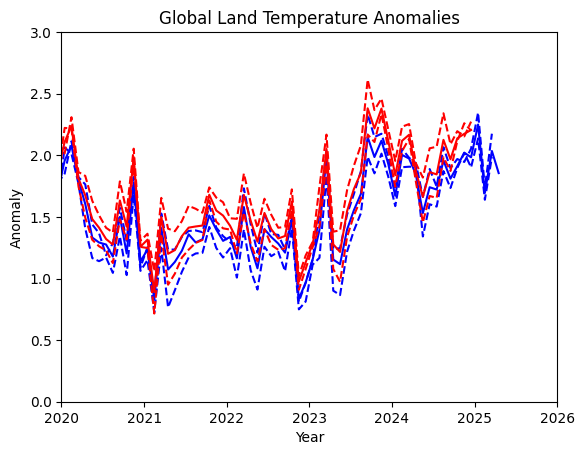

In [35]:
# plot land only global averages
be_tavg_global_land.plot(label='Berkeley Earth Tavg Land', color='blue')
be_tmax_global_land.plot(label='Berkeley Earth Tmax Land', color='blue', linestyle='--')
be_tmin_global_land.plot(label='Berkeley Earth Tmin Land', color='blue', linestyle='--')
era5_tavg_global_land.plot(label='ERA5 Tavg Land', color='red')
era5_tmax_global_land.plot(label='ERA5 Tmax Land', color='red', linestyle='--')
era5_tmin_global_land.plot(label='ERA5 Tmin Land', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Anomaly')
# set xlimit to 2000 to 2026. Note the dates are in date-time format
plt.xlim(np.datetime64('2020-01-01'), np.datetime64('2026-01-01'))
plt.ylim(0,3)
#plt.legend()
plt.title('Global Land Temperature Anomalies')
plt.show()  

In [21]:
print(f"Most recent value of ERA5: {era5_tavg_global[-6].values:.2f} °C on {era5_tavg_global.time[-5].values}")
print(f"Most recent value of Berkeley Earth: {be_tavg_global[-6].values:.2f} °C on {be_tavg_global.time[-5].values}")

Most recent value of ERA5: 1.39 °C on 2024-12-16T00:00:00.000000000
Most recent value of Berkeley Earth: 1.37 °C on 2024-12-16T00:00:00.000000000


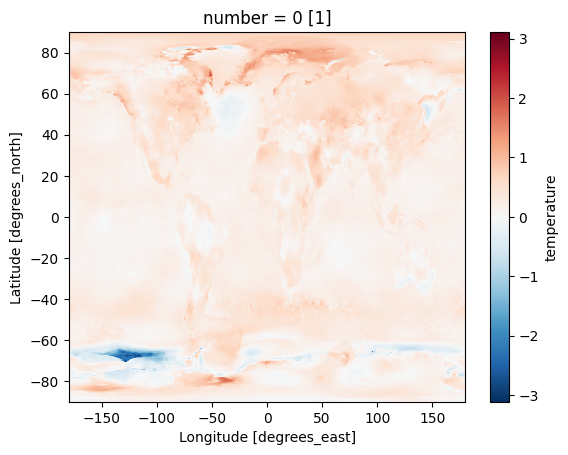

In [42]:
be_spatial_mean = be_tavg.temperature.mean(dim='time')
era5_spatial_mean = era5_tavg.temperature.mean(dim='time')

# Spatial standard deviation
#be_spatial_std = be_temp.std(dim='time')
#era5_spatial_std = era5_temp.std(dim='time')

# Difference maps
spatial_mean_diff = era5_spatial_mean - be_spatial_mean
spatial_mean_diff.plot()

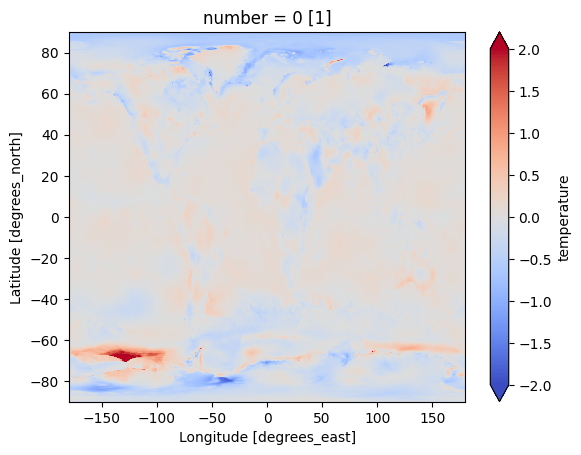

In [46]:
diff = be_tavg.temperature - era5_tavg.temperature
diff.mean(dim='time').plot(vmin=-2, vmax=2, cmap = 'coolwarm')